In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates= list(lats_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coquimbo
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | achisay
City not found. Skipping...
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | port hawkesbury
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | mehamn
Processing Record 10 of Set 1 | argayash
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | norrkoping
Processing Record 15 of Set 1 | ugoofaaru
Processing Record 16 of Set 1 | olean
Processing Record 17 of Set 1 | plettenberg bay
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | pangkalanbuun
Processing Record 22 of Set 1 | barrow
Proc

Processing Record 38 of Set 4 | shenjiamen
Processing Record 39 of Set 4 | oksfjord
Processing Record 40 of Set 4 | kollumerland
City not found. Skipping...
Processing Record 41 of Set 4 | olafsvik
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | mayfield
Processing Record 44 of Set 4 | athmallik
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 47 of Set 4 | gurupi
Processing Record 48 of Set 4 | beringovskiy
Processing Record 49 of Set 4 | araouane
Processing Record 50 of Set 4 | san cristobal
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | agadez
Processing Record 3 of Set 5 | houma
Processing Record 4 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | sur
Processing Record 7 of Set 5 | hamilton
Processing Record 8 of Set 5 | qasigiannguit
Processing Record 9 of Set 5 | santa marta
Proc

Processing Record 25 of Set 8 | ulma
Processing Record 26 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 27 of Set 8 | gangotri
City not found. Skipping...
Processing Record 28 of Set 8 | nayoro
Processing Record 29 of Set 8 | itoman
Processing Record 30 of Set 8 | rongcheng
Processing Record 31 of Set 8 | tenenkou
Processing Record 32 of Set 8 | kushima
Processing Record 33 of Set 8 | caltagirone
Processing Record 34 of Set 8 | palmer
Processing Record 35 of Set 8 | milkovo
Processing Record 36 of Set 8 | port keats
Processing Record 37 of Set 8 | boden
Processing Record 38 of Set 8 | chumikan
Processing Record 39 of Set 8 | vostok
Processing Record 40 of Set 8 | san policarpo
Processing Record 41 of Set 8 | aksu
Processing Record 42 of Set 8 | hambantota
Processing Record 43 of Set 8 | balimo
City not found. Skipping...
Processing Record 44 of Set 8 | escanaba
Processing Record 45 of Set 8 | venado tuerto
Processing Record 46 of Set 8 | roebourne
Processing Record

Processing Record 10 of Set 12 | dengzhou
Processing Record 11 of Set 12 | saleaula
City not found. Skipping...
Processing Record 12 of Set 12 | victoria
Processing Record 13 of Set 12 | karaul
City not found. Skipping...
Processing Record 14 of Set 12 | hobyo
Processing Record 15 of Set 12 | umea
Processing Record 16 of Set 12 | dongsheng
Processing Record 17 of Set 12 | roald
Processing Record 18 of Set 12 | rio gallegos
Processing Record 19 of Set 12 | kijang
Processing Record 20 of Set 12 | vargem alta
Processing Record 21 of Set 12 | steinbach
Processing Record 22 of Set 12 | cape canaveral
Processing Record 23 of Set 12 | byron bay
Processing Record 24 of Set 12 | vangaindrano
Processing Record 25 of Set 12 | nabire
Processing Record 26 of Set 12 | port hardy
Processing Record 27 of Set 12 | anori
Processing Record 28 of Set 12 | narino
Processing Record 29 of Set 12 | martapura
Processing Record 30 of Set 12 | puerto madryn
Processing Record 31 of Set 12 | nakamura
Processing Re

In [9]:
# Tally the number of cities collected
len(city_data)

550

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,65.93,68,20,14.97,CL,2022-03-22 19:21:59
1,Port Alfred,-33.5906,26.8910,73.15,86,0,12.30,ZA,2022-03-22 19:22:00
2,Pevek,69.7008,170.3133,23.70,78,100,22.37,RU,2022-03-22 19:22:01
3,Port Hawkesbury,45.6169,-61.3485,31.59,70,75,20.71,CA,2022-03-22 19:22:01
4,Chuy,-33.6971,-53.4616,75.76,61,100,9.19,UY,2022-03-22 19:22:01


In [11]:
# Re-order the columns 
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coquimbo,CL,2022-03-22 19:21:59,-29.9533,-71.3436,65.93,68,20,14.97
1,Port Alfred,ZA,2022-03-22 19:22:00,-33.5906,26.8910,73.15,86,0,12.30
2,Pevek,RU,2022-03-22 19:22:01,69.7008,170.3133,23.70,78,100,22.37
3,Port Hawkesbury,CA,2022-03-22 19:22:01,45.6169,-61.3485,31.59,70,75,20.71
4,Chuy,UY,2022-03-22 19:22:01,-33.6971,-53.4616,75.76,61,100,9.19


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

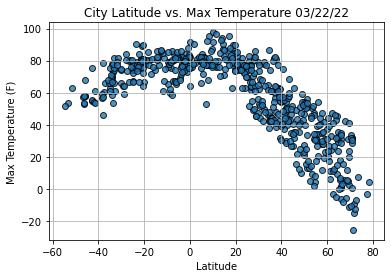

In [15]:
# Import the time module
import time

# # Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show scatter plt
plt.show()

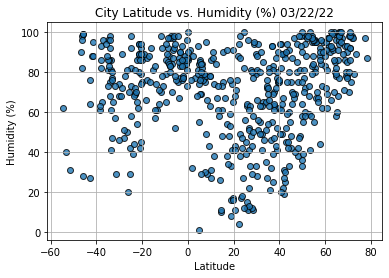

In [18]:
# Import the time module
import time

# # Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show scatter plt
plt.show()

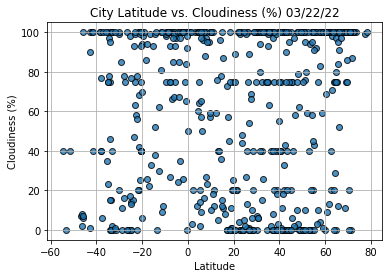

In [19]:
# Import the time module
import time

# # Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show scatter plt
plt.show()

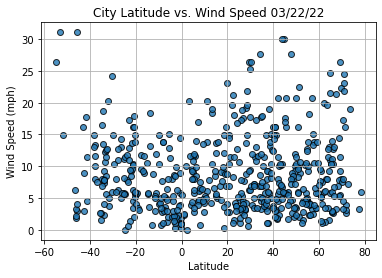

In [20]:
# Import the time module
import time

# # Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show scatter plt
plt.show()